# Teisės aktų registro duomenų problemos

Didelei daliai Seimo įstatymų, įregistruotų iki 2014 metų, trūksta įstatymo įsigaliojimo, nustojimo galioti bei kitų datų. Nuėjus į dokumento puslapį pačiame e-tar, visos reikalingos datos matosi.

Taip pat yra 47 įstatymai, turintys nustojimo galioti datą, tačiau neturintys įsigaliojimo datos.


In [16]:
import pandas as pd
from IPython.display import HTML

import warnings
warnings.filterwarnings("ignore")


In [17]:
dataset_url = "https://get.data.gov.lt/datasets/gov/lrsk/teises_aktai/Dokumentas/:format/csv"


In [18]:
df = pd.read_csv(dataset_url, low_memory=False)


In [19]:
df_seimas = df[
    (df["priemusi_inst"] == "Lietuvos Respublikos Seimas")
    & (df["rusis"] == "Įstatymas")
    & (df["registracija"] >= "1990-01-01")
]

columns = [
    "nuoroda",
    "galioj_busena",
    "tar_kodas",
    "registracija",
    "priimtas",
    "patvirtinta",
    "isigalioja",
    "isigalioja_po_salygu",
    "negalioja",
    "negalioja_po_salygu",
]
df_seimas = df_seimas[columns]

df_seimas["isigalioja2"] = df_seimas["isigalioja"].combine_first(df_seimas["isigalioja_po_salygu"])
df_seimas["negalioja2"] = df_seimas["negalioja"].combine_first(df_seimas["negalioja_po_salygu"])

In [20]:
df_seimas["nuoroda"] = df_seimas["nuoroda"].apply(lambda x: f'<a href="{x}" target="_blank">{x}</a>')


In [8]:
df_missing_dates = df_seimas[df_seimas["isigalioja2"].isnull()]
display(HTML(df_missing_dates.sample(10).to_html(escape=False, index=False)))

nuoroda,galioj_busena,tar_kodas,registracija,priimtas,patvirtinta,isigalioja,isigalioja_po_salygu,negalioja,negalioja_po_salygu
https://e-tar.lt/portal/lt/legalAct/TAR.692381DCD354,galioja,1081010ISTA00X-1432,2008-01-18,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.5CF75EE3EC82,galioja,1111010ISTA0XI-1778,2011-12-06,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.AF5E1EF50041,galioja,0971010ISTAVIII-325,1997-06-26,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.2F7E02F2E6A3,galioja,1021010ISTA0IX-1195,2002-11-12,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.5F674121F270,galioja,1041010ISTA0IX-2458,2004-09-28,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.11CDD8ED3B5C,galioja,1021010ISTA00IX-844,2002-04-16,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.2114C9F89F5F,galioja,1031010ISTA0IX-1558,2003-05-15,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.51335015B53C,galioja,1011010ISTA00IX-289,2001-04-19,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.C3C6BC6F5433,galioja,1101010ISTA0XI-1032,2010-09-23,NaN,NaN,NaN,NaN,NaN,NaN
https://e-tar.lt/portal/lt/legalAct/TAR.C5CBD04F5C9A,galioja,1081010ISTA000XI-88,2008-12-19,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_seimas["turi_isigaliojimo_data"] = df_seimas["isigalioja"].combine_first(df_seimas["isigalioja_po_salygu"]).isnull()
df_seimas["registracijos_metai"] = pd.to_datetime(df_seimas["registracija"]).dt.year


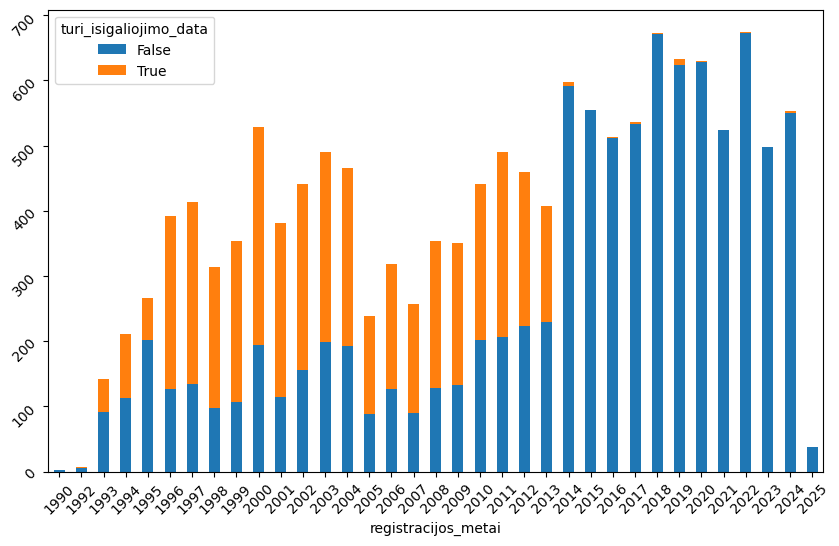

In [10]:
counts_by_year = df_seimas.groupby(["registracijos_metai", "turi_isigaliojimo_data"]).size().unstack(fill_value=0)
ax = counts_by_year.plot(
    kind="bar",
    stacked=True,
    figsize=(10,6)
)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='y', labelrotation=45)

In [22]:
df_seimas[
    df_seimas["isigalioja2"].isnull()
    & ~df_seimas["negalioja2"].isnull()
].shape

(47, 12)